Stock Price Prediction

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("D:/CORIZO/mini/Minor Project Data set (Stock Price Prediction) (1).csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [5]:
data1=data.reset_index()['Close']
data1.shape

(1009,)

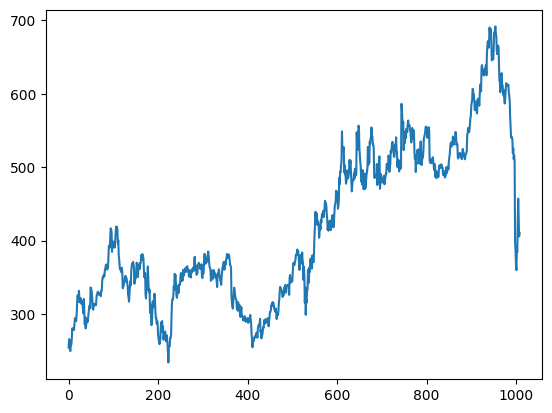

In [6]:
import matplotlib.pyplot as plt
plt.plot(data1)

In [7]:
import numpy as np
data1

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

In [8]:
#Scaling the feature close becaause LSTM is sensitive to scaling 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))
print(data1)

[[0.04451626]
 [0.06954849]
 [0.06701469]
 ...
 [0.4272515 ]
 [0.37509011]
 [0.38507243]]


In [9]:
#splitting the data into train and test
train_size=int(len(data1)*0.65)
test_size=len(data1)-train_size
train_data,test_data=data1[0:train_size,:],data1[train_size:len(data1),:1]

In [10]:
#convert an array of values into dataset matrix
def create_dataset(dataset,time_step=1):
    dataX, dataY=[], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train, y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [12]:
print(X_train.shape)
print(y_train.shape)

(554, 100)
(554,)


In [13]:
print(X_test.shape)
print(y_test.shape)

(253, 100)
(253,)


In [14]:
#reshape input to be [samples, time_steps, features] which is requested for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [15]:
#Create Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - loss: 0.0524 - val_loss: 0.0114
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0069 - val_loss: 0.0318
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 0.0051 - val_loss: 0.0115
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0040 - val_loss: 0.0073
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0031 - val_loss: 0.0075
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0030 - val_loss: 0.0130
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0026 - val_loss: 0.0130
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0028 - val_loss: 0.0071
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0023 - val_loss: 0.0080
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0024 - val_loss: 0.0093
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.0025 - val_loss: 0.0076
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0

In [19]:
#Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [20]:
#transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

360.65630294176566

In [22]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

546.2409201273803

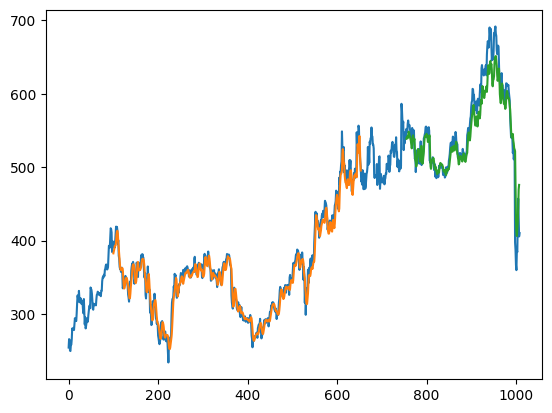

In [23]:
#Plotting
#shift train predictions for plotting
look_back=100
trainPredictPlot=np.empty_like(data1)
trainPredictPlot[:,:]=np.NaN
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict


#shift test predictions for plotting
testPredictPlot=np.empty_like(data1)
testPredictPlot[:,:]=np.NaN
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1,:]=test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
len(test_data)

354

In [25]:
x_input=test_data[254:].reshape(-1,1)
x_input.shape

(100, 1)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [27]:
#demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while i<30:
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape(1,n_steps, 1)
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.4365438]
2
[0.4365438]
3
[0.4365438]
4
[0.4365438]
5
[0.4365438]
6
[0.4365438]
7
[0.4365438]
8
[0.4365438]
9
[0.4365438]
10
[0.4365438]
11
[0.4365438]
12
[0.4365438]
13
[0.4365438]
14
[0.4365438]
15
[0.4365438]
16
[0.4365438]
17
[0.4365438]
18
[0.4365438]
19
[0.4365438]
20
[0.4365438]
21
[0.4365438]
22
[0.4365438]
23
[0.4365438]
24
[0.4365438]
25
[0.4365438]
26
[0.4365438]
27
[0.4365438]
28
[0.4365438]
29
[0.4365438]
30
[0.4365438]
31
[[0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365437924861908], [0.4365

In [28]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [29]:
data3=data1.tolist()
data3.extend(lst_output)

In [30]:
len(data1)

1009

In [40]:
1009-100


909

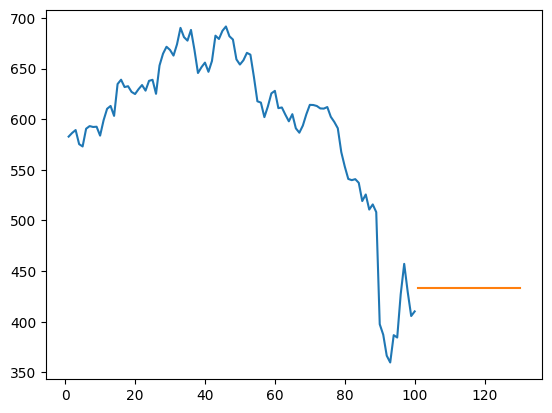

In [41]:
plt.plot(day_new,scaler.inverse_transform(data1[909:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

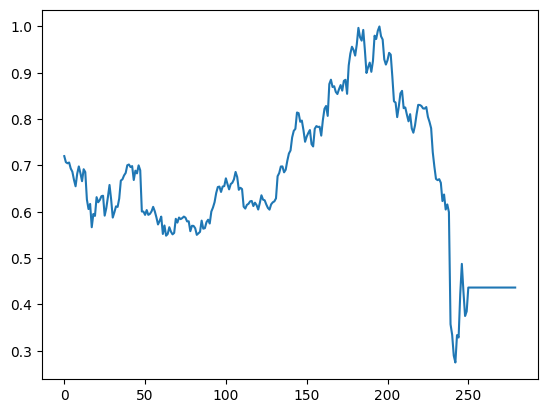

In [46]:
data3=data1.tolist()
data3.extend(lst_output)
plt.plot(data3[759:])

In [45]:
1009-250

759